In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pickle
from collections import defaultdict
import patsy

%matplotlib inline

pd.options.display.float_format = '{:20,.2f}'.format
pd.options.display.max_columns = 100
pd.options.display.max_rows = 50

In [2]:
with open('movies_scrapy/movies_data_final.json') as json_data:
    d = json.load(json_data)


In [3]:
def get_value(my_list, index=1):
    try:
        value = my_list[index]
    except:
        value = np.nan
    return value

def make_datetime(my_date):
    try:
        my_date = my_date.strip()
        new = datetime.strptime(my_date, '%d %B %Y')
    except:
        new = np.nan
    return new

def make_dict(my_series):
    d = defaultdict(int)
    for item in my_series:
        d[item] += 1
    return d

def dict_match(my_list, my_dict):
    sum = 0
    for i in my_list:
        try:
            nom = my_dict[i]
            sum += nom
        except:
            next
    if sum == 0:
        return "No noms"
    elif sum > 4:
        return "5 or more"
    else:
        return "1-4 noms"

def adj_inf(value, year):
    inf = {1996: 156.9,
           1997: 160.5,
           1998: 163.0, 
           1999: 166.6,
           2000: 172.2, 
           2001: 177.1, 
           2002: 179.9, 
           2003: 184.0, 
           2004: 188.9,
           2005: 195.3,
           2006: 201.6,
           2007: 207.3,
           2008: 215.303, 
           2009: 214.537,
           2010: 218.056,
           2011: 224.939,
           2012: 229.594, 
           2013: 232.957,
           2014: 236.736,
           2015: 237.017,
           2016: 240.007}
    ratio = inf.get(2016) / inf.get(year)
    return value * ratio


In [4]:
df = pd.DataFrame(d)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9595 entries, 0 to 9594
Data columns (total 13 columns):
actors             9595 non-null object
budget             9595 non-null object
director           9595 non-null object
genre              9595 non-null object
gross_domestic     9595 non-null object
imdb_rating        9595 non-null object
meta_score         9595 non-null object
mpaa_rating        9595 non-null object
opening_weekend    9595 non-null object
release_date       9595 non-null object
runtime_mins       9595 non-null object
title              9595 non-null object
writer             9585 non-null object
dtypes: object(13)
memory usage: 974.6+ KB


In [6]:
df.head()

,actors,budget,director,genre,gross_domestic,imdb_rating,meta_score,mpaa_rating,opening_weekend,release_date,runtime_mins,title,writer
0,"[Bruce Willis, Helen Mirren, Morgan Freeman]","[\n , $58,000,000 \n\n ...",[Robert Schwentke],"[ Action, Comedy, Crime, Thriller]","[\n , $90,356,857 \n\n ...",[7.1],[60],PG-13\n,"[\n , $21,761,408 \n\n ...","[\n , 15 October 2010 (USA)\n , \n ]",[\n 1h 51min\n ...,[RED (2010) - IMDb],Jon Hoeber
1,"[Jay Baruchel, Gerard Butler, Christopher Mint...","[\n , $165,000,000 \n\n ...","[Dean DeBlois, Chris Sanders]","[ Animation, Action, Adventure, Comedy, Fa...","[\n , $217,387,997, \n , , ,...",[8.2],[74],PG\n,"[\n , $43,732,319 \n\n ...","[\n , 26 March 2010 (USA)\n , \n ]",[\n 1h 38min\n ...,[How to Train Your Dragon (2010) - IMDb],William Davies
2,"[Adam Sandler, Salma Hayek, Kevin James]","[\n , $80,000,000 \n\n ...",[Dennis Dugan],"[ Comedy, Family]","[\n , $162,001,186 \n\n ...",[6.0],[30],PG-13\n,"[\n , $40,506,562 \n\n ...","[\n , 25 June 2010 (USA)\n , \n ]",[\n 1h 42min\n ...,[Grown Ups (2010) - IMDb],Adam Sandler
3,"[Steve Carell, Jason Segel, Russell Brand]","[\n , $56,397,125 \n\n ...","[Pierre Coffin, Chris Renaud]","[ Animation, Adventure, Comedy, Family]","[\n , \n , , , , \n ]",[7.7],[72],PG\n,"[\n , $251,501,645 \n\n ...","[\n , 9 July 2010 (USA)\n , \n ]",[\n 1h 35min\n ...,[Despicable Me (2010) - IMDb],Cinco Paul
4,"[Jesse Eisenberg, Emma Stone, Woody Harrelson]","[\n , $23,600,000 \n\n ...",[Ruben Fleischer],"[ Adventure, Comedy, Horror, Sci-Fi]","[\n , $75,590,286 \n\n ...",[7.7],[73],R\n,"[\n , $24,733,155 \n\n ...","[\n , 2 October 2009 (USA)\n , \n ]",[\n 1h 28min\n ...,[Zombieland (2009) - IMDb],Rhett Reese


In [7]:
# Pull out relevant data from observations with lists
df['budget'] = df['budget'].apply(lambda x: get_value(x, index=1))
df['director'] = df['director'].apply(lambda x: get_value(x, index=0))
df['gross_domestic'] = df['gross_domestic'].apply(lambda x: get_value(x, index=1))
df['imdb_rating'] = df['imdb_rating'].apply(lambda x: get_value(x, index=0))
df['meta_score'] = df['meta_score'].apply(lambda x: get_value(x, index=0))
df['opening_weekend'] = df['opening_weekend'].apply(lambda x: get_value(x, index=1))
df['release_date'] = df['release_date'].apply(lambda x: get_value(x, index=1))
df['runtime_mins'] = df['runtime_mins'].apply(lambda x: get_value(x, index=1))
df['title'] = df['title'].apply(lambda x: get_value(x, index=0))

# Remove extra characters and whitespace
df['mpaa_rating'] = df.mpaa_rating.replace('\n', '')
df['mpaa_rating'] = df['mpaa_rating'].str.strip()
df['release_date'] = df['release_date'].str.replace('\n', '')
df['release_date'] = df['release_date'].str.replace(' \(.*$', '')
df['title'] = df['title'].str.replace(' \(.*$', '')
df['director'] = df['director'].str.strip()
df['writer'] = df['writer'].str.strip()
df['mpaa_rating'] = df.mpaa_rating.replace('', np.nan)
df['genre'] = df.genre.apply(lambda x: np.nan if len(x)==0 else x)

# budget, opening_weekend, and runtime to numeric
df[['budget', 'opening_weekend', 'runtime_mins', 'gross_domestic', 'imdb_rating', 'meta_score']] = df[['budget', 'opening_weekend', 'runtime_mins', 'gross_domestic', 'imdb_rating', 'meta_score']].apply(lambda x: pd.to_numeric(x.replace('[^0-9]', '', regex=True), errors='coerce'))

# convert release to datetime
df['release_date'] = df['release_date'].apply(make_datetime)


In [8]:
df.head()

,actors,budget,director,genre,gross_domestic,imdb_rating,meta_score,mpaa_rating,opening_weekend,release_date,runtime_mins,title,writer
0,"[Bruce Willis, Helen Mirren, Morgan Freeman]","58,000,000.00",Robert Schwentke,"[ Action, Comedy, Crime, Thriller]","90,356,857.00",71.00,60.00,PG-13,"21,761,408.00",2010-10-15,111.00,RED,Jon Hoeber
1,"[Jay Baruchel, Gerard Butler, Christopher Mint...","165,000,000.00",Dean DeBlois,"[ Animation, Action, Adventure, Comedy, Fa...","217,387,997.00",82.00,74.00,PG,"43,732,319.00",2010-03-26,98.00,How to Train Your Dragon,William Davies
2,"[Adam Sandler, Salma Hayek, Kevin James]","80,000,000.00",Dennis Dugan,"[ Comedy, Family]","162,001,186.00",60.00,30.00,PG-13,"40,506,562.00",2010-06-25,102.00,Grown Ups,Adam Sandler
3,"[Steve Carell, Jason Segel, Russell Brand]","56,397,125.00",Pierre Coffin,"[ Animation, Adventure, Comedy, Family]",nan,77.00,72.00,PG,"251,501,645.00",2010-07-09,95.00,Despicable Me,Cinco Paul
4,"[Jesse Eisenberg, Emma Stone, Woody Harrelson]","23,600,000.00",Ruben Fleischer,"[ Adventure, Comedy, Horror, Sci-Fi]","75,590,286.00",77.00,73.00,R,"24,733,155.00",2009-10-02,88.00,Zombieland,Rhett Reese


In [9]:
# drop na rows and reset index
df = df.dropna()
df.reset_index(inplace=True, drop=True)
df.head()

,actors,budget,director,genre,gross_domestic,imdb_rating,meta_score,mpaa_rating,opening_weekend,release_date,runtime_mins,title,writer
0,"[Bruce Willis, Helen Mirren, Morgan Freeman]","58,000,000.00",Robert Schwentke,"[ Action, Comedy, Crime, Thriller]","90,356,857.00",71.00,60.00,PG-13,"21,761,408.00",2010-10-15,111.00,RED,Jon Hoeber
1,"[Jay Baruchel, Gerard Butler, Christopher Mint...","165,000,000.00",Dean DeBlois,"[ Animation, Action, Adventure, Comedy, Fa...","217,387,997.00",82.00,74.00,PG,"43,732,319.00",2010-03-26,98.00,How to Train Your Dragon,William Davies
2,"[Adam Sandler, Salma Hayek, Kevin James]","80,000,000.00",Dennis Dugan,"[ Comedy, Family]","162,001,186.00",60.00,30.00,PG-13,"40,506,562.00",2010-06-25,102.00,Grown Ups,Adam Sandler
3,"[Jesse Eisenberg, Emma Stone, Woody Harrelson]","23,600,000.00",Ruben Fleischer,"[ Adventure, Comedy, Horror, Sci-Fi]","75,590,286.00",77.00,73.00,R,"24,733,155.00",2009-10-02,88.00,Zombieland,Rhett Reese
4,"[Edward Asner, Jordan Nagai, John Ratzenberger]","175,000,000.00",Pete Docter,"[ Animation, Adventure, Comedy, Family]","292,979,556.00",83.00,88.00,PG,"68,108,790.00",2009-05-29,96.00,Up,Pete Docter


In [10]:
# add column for release month and year
df['release_month'] = df.release_date.apply(lambda x: x.strftime("%B"))
df['release_year'] = df.release_date.apply(lambda x: x.year)

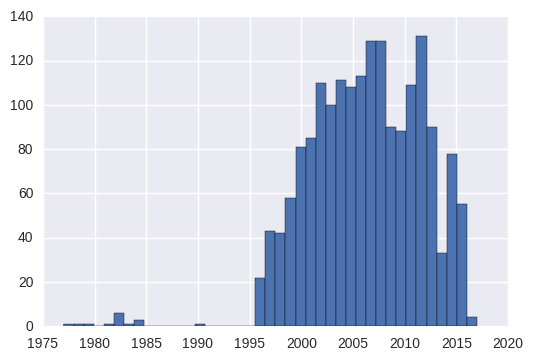

In [11]:
# distribution of years
df.release_year.hist(bins=41)

In [12]:
# Drop the 19 movies before 1996 and after 2016
df = df[(df.release_year >= 1996) & (df.release_year < 2017)]
print df.describe()
print df.info()

                    budget       gross_domestic          imdb_rating  \
count             1,805.00             1,805.00             1,805.00   
mean         43,202,579.50        53,312,823.96                63.73   
std          43,580,070.81        72,254,037.12                10.14   
min               7,000.00             1,098.00                19.00   
25%          13,000,000.00        10,139,254.00                58.00   
50%          30,000,000.00        31,806,100.00                65.00   
75%          60,000,000.00        67,629,105.00                71.00   
max         250,000,000.00       936,627,416.00                90.00   

                meta_score      opening_weekend         runtime_mins  \
count             1,805.00             1,805.00             1,805.00   
mean                 52.38        14,780,432.05               108.38   
std                  17.48        21,814,197.98                17.35   
min                   5.00               676.00                

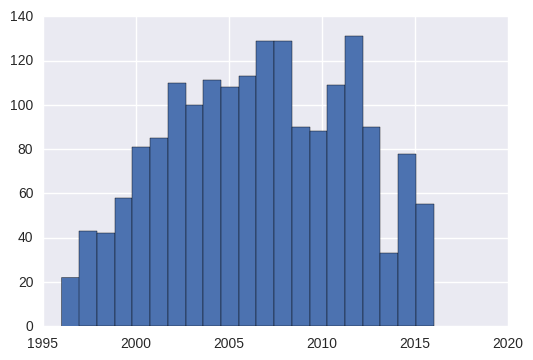

In [13]:
df.release_year.hist(bins=21)

In [14]:
df = df.dropna()
df.reset_index(inplace=True, drop=True)

In [15]:
# add column for inflation adjusted gross, opening, and budget
df['inf_budget'] = df.apply(lambda x: adj_inf(x['budget'],x['release_year']), axis=1)
df['inf_gross'] = df.apply(lambda x: adj_inf(x['gross_domestic'],x['release_year']), axis=1)
df['inf_opening'] = df.apply(lambda x: adj_inf(x['opening_weekend'],x['release_year']), axis=1)
df.head()

,actors,budget,director,genre,gross_domestic,imdb_rating,meta_score,mpaa_rating,opening_weekend,release_date,runtime_mins,title,writer,release_month,release_year,inf_budget,inf_gross,inf_opening
0,"[Bruce Willis, Helen Mirren, Morgan Freeman]","58,000,000.00",Robert Schwentke,"[ Action, Comedy, Crime, Thriller]","90,356,857.00",71.00,60.00,PG-13,"21,761,408.00",2010-10-15,111.00,RED,Jon Hoeber,October,2010,"63,838,674.47","99,452,792.76","23,952,059.33"
1,"[Jay Baruchel, Gerard Butler, Christopher Mint...","165,000,000.00",Dean DeBlois,"[ Animation, Action, Adventure, Comedy, Fa...","217,387,997.00",82.00,74.00,PG,"43,732,319.00",2010-03-26,98.00,How to Train Your Dragon,William Davies,March,2010,"181,610,022.20","239,271,751.27","48,134,711.66"
2,"[Adam Sandler, Salma Hayek, Kevin James]","80,000,000.00",Dennis Dugan,"[ Comedy, Family]","162,001,186.00",60.00,30.00,PG-13,"40,506,562.00",2010-06-25,102.00,Grown Ups,Adam Sandler,June,2010,"88,053,344.10","178,309,327.18","44,584,228.02"
3,"[Jesse Eisenberg, Emma Stone, Woody Harrelson]","23,600,000.00",Ruben Fleischer,"[ Adventure, Comedy, Horror, Sci-Fi]","75,590,286.00",77.00,73.00,R,"24,733,155.00",2009-10-02,88.00,Zombieland,Rhett Reese,October,2009,"26,401,810.41","84,564,423.72","27,669,494.46"
4,"[Edward Asner, Jordan Nagai, John Ratzenberger]","175,000,000.00",Pete Docter,"[ Animation, Adventure, Comedy, Family]","292,979,556.00",83.00,88.00,PG,"68,108,790.00",2009-05-29,96.00,Up,Pete Docter,May,2009,"195,776,136.52","327,762,317.44","76,194,718.68"


In [16]:
# sanity check
print df.describe()

# are there any entries with opening weekend amount greater than gross?
df[df.inf_opening > df.inf_gross]

                    budget       gross_domestic          imdb_rating  \
count             1,805.00             1,805.00             1,805.00   
mean         43,202,579.50        53,312,823.96                63.73   
std          43,580,070.81        72,254,037.12                10.14   
min               7,000.00             1,098.00                19.00   
25%          13,000,000.00        10,139,254.00                58.00   
50%          30,000,000.00        31,806,100.00                65.00   
75%          60,000,000.00        67,629,105.00                71.00   
max         250,000,000.00       936,627,416.00                90.00   

                meta_score      opening_weekend         runtime_mins  \
count             1,805.00             1,805.00             1,805.00   
mean                 52.38        14,780,432.05               108.38   
std                  17.48        21,814,197.98                17.35   
min                   5.00               676.00                

,actors,budget,director,genre,gross_domestic,imdb_rating,meta_score,mpaa_rating,opening_weekend,release_date,runtime_mins,title,writer,release_month,release_year,inf_budget,inf_gross,inf_opening


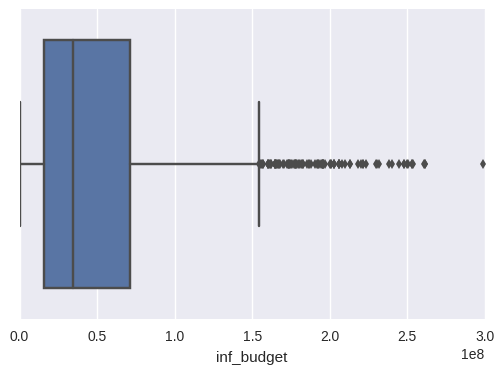

In [17]:
# check for outliers
sns.boxplot(df.inf_budget)

In [18]:
# Top 10 movies with highest budgets
df.sort_values(['inf_budget'], ascending=False).head(10)

,actors,budget,director,genre,gross_domestic,imdb_rating,meta_score,mpaa_rating,opening_weekend,release_date,runtime_mins,title,writer,release_month,release_year,inf_budget,inf_gross,inf_opening
472,"[Leonardo DiCaprio, Kate Winslet, Billy Zane]","200,000,000.00",James Cameron,"[ Drama, Romance]","658,672,302.00",77.00,74.00,PG-13,"28,638,131.00",1997-12-19,194.00,Titanic,James Cameron,December,1997,"299,074,143.30","984,959,272.19","42,824,622.47"
25,"[Christian Bale, Tom Hardy, Anne Hathaway]","250,000,000.00",Christopher Nolan,"[ Action, Thriller]","448,130,642.00",85.00,78.00,PG-13,"160,887,295.00",2012-07-20,164.00,The Dark Knight Rises,Jonathan Nolan,July,2012,"261,338,493.17","468,455,146.89","168,184,172.98"
14,"[Taylor Kitsch, Lynn Collins, Willem Dafoe]","250,000,000.00",Andrew Stanton,"[ Action, Adventure, Sci-Fi]","73,058,679.00",66.00,51.00,PG-13,"30,180,188.00",2012-03-09,132.00,John Carter,Andrew Stanton,March,2012,"261,338,493.17","76,372,180.33","31,548,979.42"
1569,"[Arnold Schwarzenegger, Nick Stahl, Kristanna ...","200,000,000.00",Jonathan Mostow,"[ Action, Sci-Fi, Thriller]","150,350,192.00",64.00,66.00,R,"44,041,440.00",2003-07-02,109.00,Terminator 3: Rise of the Machines,James Cameron,July,2003,"260,877,173.91","196,114,665.93","57,447,032.01"
1653,"[Tobey Maguire, Kirsten Dunst, Alfred Molina]","200,000,000.00",Sam Raimi,"[ Action, Adventure]","373,377,893.00",73.00,83.00,PG-13,"115,817,364.00",2004-06-30,127.00,Spider-Man 2,Stan Lee,June,2004,"254,110,111.17","474,395,489.49","147,151,816.21"
123,"[Ian McKellen, Martin Freeman, Richard Armitage]","250,000,000.00",Peter Jackson,"[ Adventure, Fantasy]","255,108,370.00",74.00,59.00,PG-13,"54,724,334.00",2014-12-17,144.00,The Hobbit: The Battle of the Five Armies,Fran Walsh,December,2014,"253,454,269.74","258,633,222.49","55,480,464.44"
720,"[Robert Downey Jr., Chris Evans, Mark Ruffalo]","250,000,000.00",Joss Whedon,"[ Action, Adventure, Sci-Fi]","458,991,599.00",74.00,66.00,PG-13,"191,271,109.00",2015-05-01,141.00,Avengers: Age of Ultron,Joss Whedon,May,2015,"253,153,782.22","464,781,837.17","193,684,018.69"
140,"[Ben Barnes, Skandar Keynes, Georgie Henley]","225,000,000.00",Andrew Adamson,"[ Action, Adventure, Family, Fantasy]","141,614,023.00",66.00,62.00,PG,"55,034,805.00",2008-05-16,150.00,The Chronicles of Narnia: Prince Caspian,Andrew Adamson,May,2008,"250,816,639.81","157,862,903.99","61,349,532.72"
626,"[Ben Affleck, Henry Cavill, Amy Adams]","250,000,000.00",Zack Snyder,"[ Action, Adventure, Sci-Fi]","330,249,062.00",67.00,44.00,PG-13,"166,007,347.00",2016-03-25,151.00,Batman v Superman: Dawn of Justice,Chris Terrio,March,2016,"250,000,000.00","330,249,062.00","166,007,347.00"
722,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","245,000,000.00",Sam Mendes,"[ Action, Adventure, Thriller]","200,074,175.00",68.00,60.00,PG-13,"70,403,148.00",2015-11-06,148.00,Spectre,John Logan,November,2015,"248,090,706.57","202,598,136.50","71,291,292.79"


In [19]:
# Top 10 movies with highest opening weekend
df.sort_values(['inf_opening'], ascending=False).head(10)

,actors,budget,director,genre,gross_domestic,imdb_rating,meta_score,mpaa_rating,opening_weekend,release_date,runtime_mins,title,writer,release_month,release_year,inf_budget,inf_gross,inf_opening
711,"[Daisy Ridley, John Boyega, Oscar Isaac]","245,000,000.00",J.J. Abrams,"[ Action, Adventure, Fantasy, Sci-Fi]","936,627,416.00",81.00,81.00,PG-13,"247,966,675.00",2015-12-18,136.00,Star Wars: The Force Awakens,Lawrence Kasdan,December,2015,"248,090,706.57","948,443,091.56","251,094,806.56"
1778,"[Robert Downey Jr., Chris Evans, Scarlett Joha...","220,000,000.00",Joss Whedon,"[ Action, Sci-Fi]","623,279,547.00",81.00,69.00,PG-13,"207,438,708.00",2012-05-04,143.00,The Avengers,Joss Whedon,May,2012,"229,977,873.99","651,547,750.54","216,846,877.49"
720,"[Robert Downey Jr., Chris Evans, Mark Ruffalo]","250,000,000.00",Joss Whedon,"[ Action, Adventure, Sci-Fi]","458,991,599.00",74.00,66.00,PG-13,"191,271,109.00",2015-05-01,141.00,Avengers: Age of Ultron,Joss Whedon,May,2015,"253,153,782.22","464,781,837.17","193,684,018.69"
1787,"[Daniel Radcliffe, Emma Watson, Rupert Grint]","125,000,000.00",David Yates,"[ Adventure, Drama, Fantasy, Mystery]","380,955,619.00",81.00,87.00,PG-13,"169,189,427.00",2011-07-15,130.00,Harry Potter and the Deathly Hallows: Part 2,Steve Kloves,July,2011,"133,373,381.23","406,474,712.03","180,522,927.58"
30,"[Robert Downey Jr., Guy Pearce, Gwyneth Paltrow]","200,000,000.00",Shane Black,"[ Action, Adventure, Sci-Fi]","408,992,272.00",72.00,62.00,PG-13,"174,144,585.00",2013-05-03,130.00,Iron Man 3,Drew Pearce,May,2013,"206,052,619.15","421,369,644.29","179,414,739.25"
7,"[Christian Bale, Heath Ledger, Aaron Eckhart]","185,000,000.00",Christopher Nolan,"[ Action, Crime, Drama, Thriller]","533,316,061.00",90.00,82.00,PG-13,"158,411,483.00",2008-07-18,152.00,The Dark Knight,Jonathan Nolan,July,2008,"206,227,014.95","594,509,077.22","176,587,714.99"
25,"[Christian Bale, Tom Hardy, Anne Hathaway]","250,000,000.00",Christopher Nolan,"[ Action, Thriller]","448,130,642.00",85.00,78.00,PG-13,"160,887,295.00",2012-07-20,164.00,The Dark Knight Rises,Jonathan Nolan,July,2012,"261,338,493.17","468,455,146.89","168,184,172.98"
626,"[Ben Affleck, Henry Cavill, Amy Adams]","250,000,000.00",Zack Snyder,"[ Action, Adventure, Sci-Fi]","330,249,062.00",67.00,44.00,PG-13,"166,007,347.00",2016-03-25,151.00,Batman v Superman: Dawn of Justice,Chris Terrio,March,2016,"250,000,000.00","330,249,062.00","166,007,347.00"
1745,"[Jennifer Lawrence, Josh Hutcherson, Liam Hems...","130,000,000.00",Francis Lawrence,"[ Action, Adventure, Mystery, Sci-Fi, Thri...","424,645,577.00",76.00,76.00,PG-13,"158,074,286.00",2013-11-22,146.00,The Hunger Games: Catching Fire,Simon Beaufoy,November,2013,"133,934,202.45","437,496,666.76","162,858,103.26"
882,"[Jennifer Lawrence, Josh Hutcherson, Liam Hems...","78,000,000.00",Gary Ross,"[ Action, Adventure, Sci-Fi, Thriller]","407,999,255.00",72.00,68.00,PG-13,"152,535,747.00",2012-03-23,142.00,The Hunger Games,Gary Ross,March,2012,"81,537,609.87","426,503,642.06","159,453,849.10"


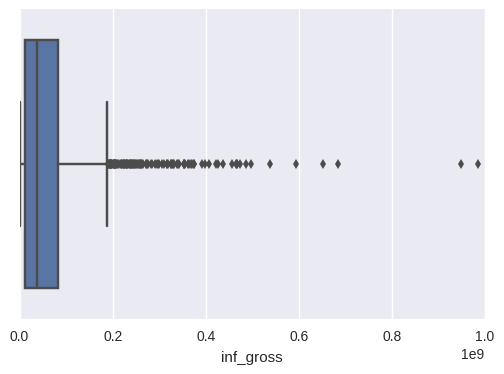

In [20]:
sns.boxplot(df.inf_gross)

In [21]:
# Top 10 movies with highest gross domestic
df.sort_values(['inf_gross'], ascending=False).head(20)

,actors,budget,director,genre,gross_domestic,imdb_rating,meta_score,mpaa_rating,opening_weekend,release_date,runtime_mins,title,writer,release_month,release_year,inf_budget,inf_gross,inf_opening
472,"[Leonardo DiCaprio, Kate Winslet, Billy Zane]","200,000,000.00",James Cameron,"[ Drama, Romance]","658,672,302.00",77.00,74.00,PG-13,"28,638,131.00",1997-12-19,194.00,Titanic,James Cameron,December,1997,"299,074,143.30","984,959,272.19","42,824,622.47"
711,"[Daisy Ridley, John Boyega, Oscar Isaac]","245,000,000.00",J.J. Abrams,"[ Action, Adventure, Fantasy, Sci-Fi]","936,627,416.00",81.00,81.00,PG-13,"247,966,675.00",2015-12-18,136.00,Star Wars: The Force Awakens,Lawrence Kasdan,December,2015,"248,090,706.57","948,443,091.56","251,094,806.56"
1800,"[Ewan McGregor, Liam Neeson, Natalie Portman]","115,000,000.00",George Lucas,"[ Action, Adventure, Fantasy, Sci-Fi]","474,544,677.00",65.00,51.00,PG,"64,810,970.00",1999-05-19,136.00,Star Wars: Episode I - The Phantom Menace,George Lucas,May,1999,"165,671,098.44","683,637,720.84","93,367,866.01"
1778,"[Robert Downey Jr., Chris Evans, Scarlett Joha...","220,000,000.00",Joss Whedon,"[ Action, Sci-Fi]","623,279,547.00",81.00,69.00,PG-13,"207,438,708.00",2012-05-04,143.00,The Avengers,Joss Whedon,May,2012,"229,977,873.99","651,547,750.54","216,846,877.49"
7,"[Christian Bale, Heath Ledger, Aaron Eckhart]","185,000,000.00",Christopher Nolan,"[ Action, Crime, Drama, Thriller]","533,316,061.00",90.00,82.00,PG-13,"158,411,483.00",2008-07-18,152.00,The Dark Knight,Jonathan Nolan,July,2008,"206,227,014.95","594,509,077.22","176,587,714.99"
1737,"[Tobey Maguire, Kirsten Dunst, Willem Dafoe]","139,000,000.00",Sam Raimi,"[ Action, Adventure]","403,706,375.00",73.00,73.00,PG-13,"114,844,116.00",2002-05-03,121.00,Spider-Man,Stan Lee,May,2002,"185,441,762.09","538,590,083.07","153,215,073.65"
1796,"[Albert Brooks, Ellen DeGeneres, Alexander Gould]","94,000,000.00",Andrew Stanton,"[ Animation, Adventure, Comedy, Family]","380,838,870.00",81.00,90.00,G,"70,251,710.00",2003-05-30,100.00,Finding Nemo,Andrew Stanton,May,2003,"122,612,271.74","496,760,840.61","91,635,337.84"
714,"[Ellen DeGeneres, Albert Brooks, Ed O'Neill]","200,000,000.00",Andrew Stanton,"[ Animation, Adventure, Comedy, Family]","486,292,984.00",75.00,77.00,PG,"135,060,273.00",2016-06-17,97.00,Finding Dory,Andrew Stanton,June,2016,"200,000,000.00","486,292,984.00","135,060,273.00"
1653,"[Tobey Maguire, Kirsten Dunst, Alfred Molina]","200,000,000.00",Sam Raimi,"[ Action, Adventure]","373,377,893.00",73.00,83.00,PG-13,"115,817,364.00",2004-06-30,127.00,Spider-Man 2,Stan Lee,June,2004,"254,110,111.17","474,395,489.49","147,151,816.21"
25,"[Christian Bale, Tom Hardy, Anne Hathaway]","250,000,000.00",Christopher Nolan,"[ Action, Thriller]","448,130,642.00",85.00,78.00,PG-13,"160,887,295.00",2012-07-20,164.00,The Dark Knight Rises,Jonathan Nolan,July,2012,"261,338,493.17","468,455,146.89","168,184,172.98"


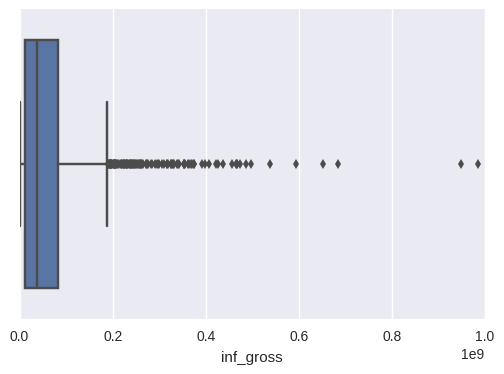

In [22]:
sns.boxplot(df.inf_gross)

In [23]:
df = df.dropna()
df.reset_index(inplace=True, drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1805 entries, 0 to 1804
Data columns (total 18 columns):
actors             1805 non-null object
budget             1805 non-null float64
director           1805 non-null object
genre              1805 non-null object
gross_domestic     1805 non-null float64
imdb_rating        1805 non-null float64
meta_score         1805 non-null float64
mpaa_rating        1805 non-null object
opening_weekend    1805 non-null float64
release_date       1805 non-null datetime64[ns]
runtime_mins       1805 non-null float64
title              1805 non-null object
writer             1805 non-null object
release_month      1805 non-null object
release_year       1805 non-null int64
inf_budget         1805 non-null float64
inf_gross          1805 non-null float64
inf_opening        1805 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(1), object(7)
memory usage: 253.9+ KB


In [24]:
# find number of unique ratings
print(df.mpaa_rating.value_counts())
print('\n')
print(len(df.mpaa_rating.value_counts()))
print('\n')

# Not Rated = Unrated
df['mpaa_rating'] = df.mpaa_rating.replace('Not Rated', 'Unrated')
print(df.mpaa_rating.value_counts())
print('\n')
print(len(df.mpaa_rating.value_counts()))

R            823
PG-13        752
PG           189
G             28
Not Rated     11
Unrated        2
Name: mpaa_rating, dtype: int64


6


R          823
PG-13      752
PG         189
G           28
Unrated     13
Name: mpaa_rating, dtype: int64


5


In [25]:
# create dummy variables for mpaa_rating
df_mpaa = df['mpaa_rating'].str.get_dummies()


In [26]:
df2 = df.join(df_mpaa)
df2.head()

,actors,budget,director,genre,gross_domestic,imdb_rating,meta_score,mpaa_rating,opening_weekend,release_date,runtime_mins,title,writer,release_month,release_year,inf_budget,inf_gross,inf_opening,G,PG,PG-13,R,Unrated
0,"[Bruce Willis, Helen Mirren, Morgan Freeman]","58,000,000.00",Robert Schwentke,"[ Action, Comedy, Crime, Thriller]","90,356,857.00",71.00,60.00,PG-13,"21,761,408.00",2010-10-15,111.00,RED,Jon Hoeber,October,2010,"63,838,674.47","99,452,792.76","23,952,059.33",0,0,1,0,0
1,"[Jay Baruchel, Gerard Butler, Christopher Mint...","165,000,000.00",Dean DeBlois,"[ Animation, Action, Adventure, Comedy, Fa...","217,387,997.00",82.00,74.00,PG,"43,732,319.00",2010-03-26,98.00,How to Train Your Dragon,William Davies,March,2010,"181,610,022.20","239,271,751.27","48,134,711.66",0,1,0,0,0
2,"[Adam Sandler, Salma Hayek, Kevin James]","80,000,000.00",Dennis Dugan,"[ Comedy, Family]","162,001,186.00",60.00,30.00,PG-13,"40,506,562.00",2010-06-25,102.00,Grown Ups,Adam Sandler,June,2010,"88,053,344.10","178,309,327.18","44,584,228.02",0,0,1,0,0
3,"[Jesse Eisenberg, Emma Stone, Woody Harrelson]","23,600,000.00",Ruben Fleischer,"[ Adventure, Comedy, Horror, Sci-Fi]","75,590,286.00",77.00,73.00,R,"24,733,155.00",2009-10-02,88.00,Zombieland,Rhett Reese,October,2009,"26,401,810.41","84,564,423.72","27,669,494.46",0,0,0,1,0
4,"[Edward Asner, Jordan Nagai, John Ratzenberger]","175,000,000.00",Pete Docter,"[ Animation, Adventure, Comedy, Family]","292,979,556.00",83.00,88.00,PG,"68,108,790.00",2009-05-29,96.00,Up,Pete Docter,May,2009,"195,776,136.52","327,762,317.44","76,194,718.68",0,1,0,0,0


In [27]:
# load pickeled data
with open('data/actor_nom.pk1', 'rb') as picklefile:
    actor_nom = pickle.load(picklefile)
    
with open('data/director_nom.pk1', 'rb') as picklefile:
    director_nom = pickle.load(picklefile)

with open('data/writer_nom.pk1', 'rb') as picklefile:
    writer_nom = pickle.load(picklefile)
    
# make dictionaries
d_act = make_dict(actor_nom)
d_direct = make_dict(director_nom)
d_write = make_dict(writer_nom)

In [28]:
# sanity check: Meryl Streep holds record for 20 nominations
print d_act["Meryl Streep"]

# sanity check: William Wyler holds record for 12 nominations
print d_direct['William Wyler']

#sanity check: Woody Allen holds record for 16 nominations, all for best original screenplay
print d_write['Woody Allen']

20
12
16


In [29]:
# add columns for nomination counts
df2['actor_nom'] = df2.actors.apply(lambda x: dict_match(x, d_act))
df2['director'] = df2.director.apply(lambda x: [x])
df2['director_nom'] = df2.director.apply(lambda x: dict_match(x, d_direct))
df2['writer'] = df2.writer.apply(lambda x: [x])
df2['writer_nom'] = df2.writer.apply(lambda x: dict_match(x, d_write))
df2.head()

,actors,budget,director,genre,gross_domestic,imdb_rating,meta_score,mpaa_rating,opening_weekend,release_date,runtime_mins,title,writer,release_month,release_year,inf_budget,inf_gross,inf_opening,G,PG,PG-13,R,Unrated,actor_nom,director_nom,writer_nom
0,"[Bruce Willis, Helen Mirren, Morgan Freeman]","58,000,000.00",[Robert Schwentke],"[ Action, Comedy, Crime, Thriller]","90,356,857.00",71.00,60.00,PG-13,"21,761,408.00",2010-10-15,111.00,RED,[Jon Hoeber],October,2010,"63,838,674.47","99,452,792.76","23,952,059.33",0,0,1,0,0,5 or more,No noms,No noms
1,"[Jay Baruchel, Gerard Butler, Christopher Mint...","165,000,000.00",[Dean DeBlois],"[ Animation, Action, Adventure, Comedy, Fa...","217,387,997.00",82.00,74.00,PG,"43,732,319.00",2010-03-26,98.00,How to Train Your Dragon,[William Davies],March,2010,"181,610,022.20","239,271,751.27","48,134,711.66",0,1,0,0,0,No noms,No noms,No noms
2,"[Adam Sandler, Salma Hayek, Kevin James]","80,000,000.00",[Dennis Dugan],"[ Comedy, Family]","162,001,186.00",60.00,30.00,PG-13,"40,506,562.00",2010-06-25,102.00,Grown Ups,[Adam Sandler],June,2010,"88,053,344.10","178,309,327.18","44,584,228.02",0,0,1,0,0,1-4 noms,No noms,No noms
3,"[Jesse Eisenberg, Emma Stone, Woody Harrelson]","23,600,000.00",[Ruben Fleischer],"[ Adventure, Comedy, Horror, Sci-Fi]","75,590,286.00",77.00,73.00,R,"24,733,155.00",2009-10-02,88.00,Zombieland,[Rhett Reese],October,2009,"26,401,810.41","84,564,423.72","27,669,494.46",0,0,0,1,0,5 or more,No noms,No noms
4,"[Edward Asner, Jordan Nagai, John Ratzenberger]","175,000,000.00",[Pete Docter],"[ Animation, Adventure, Comedy, Family]","292,979,556.00",83.00,88.00,PG,"68,108,790.00",2009-05-29,96.00,Up,[Pete Docter],May,2009,"195,776,136.52","327,762,317.44","76,194,718.68",0,1,0,0,0,No noms,No noms,1-4 noms


In [30]:
# find how many genres there are
df2['genre'] = df2['genre'].apply(lambda x: ','.join(x))
g = df2['genre']
g1 = g.str.split(',', expand=True).stack().reset_index()
g1.columns = ['index', 'level', 'genre']
print g1.genre.value_counts()
print len(g1.genre.value_counts())

 Drama          931
 Comedy         678
 Thriller       597
 Action         473
 Romance        439
 Crime          370
 Adventure      333
 Sci-Fi         237
 Mystery        222
 Fantasy        214
 Horror         205
 Family         179
 Biography      127
 Sport           77
 Music           70
 War             65
 History         61
 Animation       55
 Musical         25
 Western         23
 Documentary      9
Name: genre, dtype: int64
21


In [31]:
df_genre = df2['genre'].str.get_dummies(sep=',')
df_genre

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [32]:
# remove whitespace in column names
genre_col = df_genre.columns
genre_col = genre_col.str.strip().str.lower()
genre_col = genre_col.str.replace('-', '_')
df_genre.columns = genre_col
print df_genre.columns

Index([u'action', u'adventure', u'animation', u'biography', u'comedy',
       u'crime', u'documentary', u'drama', u'family', u'fantasy', u'history',
       u'horror', u'music', u'musical', u'mystery', u'romance', u'sci_fi',
       u'sport', u'thriller', u'war', u'western'],
      dtype='object')


In [33]:
# create dummy variable for months
df_months = df2['release_month'].str.get_dummies()

In [34]:
# add dummy variables for oscar nominations
df_act = df2['actor_nom'].str.get_dummies()
df_dir = df2['director_nom'].str.get_dummies()
df_wri = df2['writer_nom'].str.get_dummies()
df_act.columns = ['act_1_4', 'act_5_more', 'act_0']
df_dir.columns = ['dir_1_4', 'dir_5_more', 'dir_0']
df_wri.columns = ['wri_1_4', 'wri_5_more', 'wri_0']

In [35]:
df3 = df2.join([df_genre, df_months, df_act, df_dir, df_wri])

In [36]:
# pickel for later
with open('data/clean_data1.pk1', 'wb') as picklefile:
    pickle.dump(df3, picklefile)

In [37]:
df3

,actors,budget,director,genre,gross_domestic,imdb_rating,meta_score,mpaa_rating,opening_weekend,release_date,runtime_mins,title,writer,release_month,release_year,inf_budget,inf_gross,inf_opening,G,PG,PG-13,R,Unrated,actor_nom,director_nom,writer_nom,action,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,history,horror,music,musical,mystery,romance,sci_fi,sport,thriller,war,western,April,August,December,February,January,July,June,March,May,November,October,September,act_1_4,act_5_more,act_0,dir_1_4,dir_5_more,dir_0,wri_1_4,wri_5_more,wri_0
0,"[Bruce Willis, Helen Mirren, Morgan Freeman]","58,000,000.00",[Robert Schwentke],"Action, Comedy, Crime, Thriller","90,356,857.00",71.00,60.00,PG-13,"21,761,408.00",2010-10-15,111.00,RED,[Jon Hoeber],October,2010,"63,838,674.47","99,452,792.76","23,952,059.33",0,0,1,0,0,5 or more,No noms,No noms,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1
1,"[Jay Baruchel, Gerard Butler, Christopher Mint...","165,000,000.00",[Dean DeBlois],"Animation, Action, Adventure, Comedy, Family,...","217,387,997.00",82.00,74.00,PG,"43,732,319.00",2010-03-26,98.00,How to Train Your Dragon,[William Davies],March,2010,"181,610,022.20","239,271,751.27","48,134,711.66",0,1,0,0,0,No noms,No noms,No noms,1,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2,"[Adam Sandler, Salma Hayek, Kevin James]","80,000,000.00",[Dennis Dugan],"Comedy, Family","162,001,186.00",60.00,30.00,PG-13,"40,506,562.00",2010-06-25,102.00,Grown Ups,[Adam Sandler],June,2010,"88,053,344.10","178,309,327.18","44,584,228.02",0,0,1,0,0,1-4 noms,No noms,No noms,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1
3,"[Jesse Eisenberg, Emma Stone, Woody Harrelson]","23,600,000.00",[Ruben Fleischer],"Adventure, Comedy, Horror, Sci-Fi","75,590,286.00",77.00,73.00,R,"24,733,155.00",2009-10-02,88.00,Zombieland,[Rhett Reese],October,2009,"26,401,810.41","84,564,423.72","27,669,494.46",0,0,0,1,0,5 or more,No noms,No noms,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1
4,"[Edward Asner, Jordan Nagai, John Ratzenberger]","175,000,000.00",[Pete Docter],"Animation, Adventure, Comedy, Family","292,979,556.00",83.00,88.00,PG,"68,108,790.00",2009-05-29,96.00,Up,[Pete Docter],May,2009,"195,776,136.52","327,762,317.44","76,194,718.68",0,1,0,0,0,No noms,No noms,1-4 noms,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0
5,"[Zach Galifianakis, Bradley Cooper, Justin Bar...","35,000,000.00",[Todd Phillips],Comedy,"277,313,371.00",78.00,73.00,R,"44,979,319.00",2009-06-05,100.00,The Hangover,[Jon Lucas],June,2009,"39,155,227.30","310,236,230.74","50,319,298.84",0,0,0,1,0,1-4 noms,No noms,No noms,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1
6,"[Ben Stiller, Jack Black, Robert Downey Jr.]","92,000,000.00",[Ben Stiller],"Action, Comedy","110,416,702.00",70.00,71.00,R,"25,812,796.00",2008-08-13,107.00,Tropic Thunder,[Justin Theroux],August,2008,"102,556,137.16","123,085,983.00","28,774,572.25",0,0,0,1,0,1-4 noms,No noms,No noms,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
7,"[Christian Bale, Heath Ledger, Aaron Eckhart]","185,000,000.00",[Christopher Nolan],"Action, Crime, Drama, Thriller","533,316,061.00",90.00,82.00,PG-13,"158,411,483.00",2008-07-18,152.00,The Dark Knight,[Jonathan Nolan],July,2008,"206,227,014.95","594,509,077.22","176,587,714.99",0,0,1,0,0,5 or more,No noms,1-4 noms,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
8,"[Russell Crowe, Cung Le, Lucy Liu]","15,000,000.00",[RZA],Action,"15,608,545.00",54.00,51.00,R,"7,910,980.00",2012-11-02,95.00,The Man with the Iron Fists,[RZA],November,2012,"15,680,309.59","16,316,454.52","8,269,774.37",0,0,0,1,0,1-4 noms,No noms,No noms,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1